# GWs from bosons around black holes

In [1]:
%pylab inline
import gwaxion

Populating the interactive namespace from numpy and matplotlib


## Black holes and bosons

Let's create a black-hole--boson system starting from a given BH mass ($M = 50 M_\odot$), initial dimensionless BH spin ($\chi=0.9$) and a fine structure constant ($\alpha = 0.2$):

In [2]:
bhb = gwaxion.BlackHoleBoson.from_parameters(m_bh=50, alpha=0.2, chi_bh=0.9)

By default, the code assumes the boson is a scalar, but we could have specified a different spin-weight via the argument `spin`. Let's now print some properties of the system.

First, the BHB system contains a **black-hole** (`BlackHole`) with the following properties:

In [3]:
print("\nThe initial black-hole has a mass of %.1f MSUN (%.1e kg)."
      % (bhb.bh.mass_msun, bhb.bh.mass))
print("It also has a dimensionless spin of chi=%.2f, which corresponds to an "
      "angular momentum J=%.1e Js, and Kerr parameter a=%.1e m."
      % (bhb.bh.chi, bhb.bh.angular_momentum, bhb.bh.a))
print("The outer radius is %.1e m, with a horizon angular frequency of %.1f rad/s."
      % (bhb.bh.rp, bhb.bh.omega_horizon))


The initial black-hole has a mass of 50.0 MSUN (9.9e+31 kg).
It also has a dimensionless spin of chi=0.90, which corresponds to an angular momentum J=2.0e+45 Js, and Kerr parameter a=6.6e+04 m.
The outer radius is 1.1e+05 m, with a horizon angular frequency of 1272.5 rad/s.


Had we wanted to, we could have created a standalone black-hole by doing `bh = physics.BlackHole(50, chi=0.9, msun=True)`.

The BHB system also contains a **boson** (in this case, a scalar):

In [4]:
print("The boson has a rest-mass of %1.e kg, which corresponds to an energy of "
      "%.1e eV. Its spin is %i." % 
      (bhb.boson.mass, bhb.boson.energy_ev, bhb.boson.spin))

The boson has a rest-mass of 1e-48 kg, which corresponds to an energy of 5.3e-13 eV. Its spin is 0.


Together, the black-hole--boson system has a finestructure constant given by the ratio of the gravitational radius ($r_g=GM/c^2$) to the boson's reduced Compton wavelength [$\lambda_C = \hbar / (\mu c)$]. In this case this is:

In [5]:
bhb.alpha

0.20000000000000004

Which is what we requested when we constructed the BHB system in the first place.

## Energy levels

Let's compute the growth rate for a bunch of energy levels with quantum numbers $(l, m, n_r)$:

In [6]:
print("(l, m, nr, growth rate in Hz)")
print("----------------------------")
for l in range(0, 3):
    for m in range(0, l+1):
        for nr in range(0, 3):
            print("(%i, %i, %i, %.1e)" % (l, m, nr, bhb.level_omega_im(l, m, nr)))

(l, m, nr, growth rate in Hz)
----------------------------
(0, 0, 0, -1.5e+00)
(0, 0, 1, -1.9e-01)
(0, 0, 2, -5.5e-02)
(1, 0, 0, -1.3e-05)
(1, 0, 1, -4.5e-06)
(1, 0, 2, -2.0e-06)
(1, 1, 0, 4.2e-06)
(1, 1, 1, 1.5e-06)
(1, 1, 2, 6.5e-07)
(2, 0, 0, -4.9e-12)
(2, 0, 1, -2.9e-12)
(2, 0, 2, -1.7e-12)
(2, 1, 0, 1.3e-12)
(2, 1, 1, 7.5e-13)
(2, 1, 2, 4.4e-13)
(2, 2, 0, 7.0e-11)
(2, 2, 1, 4.2e-11)
(2, 2, 2, 2.5e-11)


Clearly the $l=m=1$ mode grows very fast. We could have also directly checked whether the $m=1$ mode satisfies the superradiant condition $\mu < m \Omega$:

In [7]:
bhb.is_superradiant(1)

True

We can also directly ask for the fastest growing level:

In [8]:
bhb.max_growth_rate()

(1, 1, 0, 4.175501554995195e-06)

The energy of a given level is given by $E_n = E_0(1-\frac{\alpha^2}{2n^2})$, where $E_0=mc^2$ and $n$ is the principal quantum number. For the $l=1, n_r=0$ level this is:

In [9]:
l, nr = (1, 0)
print("%.2e eV" % bhb.level_energy(l + nr + 1))

5.32e-13 eV


## Clouds

We can now add a cloud to our BHB system to populate the largest growing level:

In [10]:
cloud = bhb.best_cloud()

The system now has one cloud with $(l=1, m=1, n_r=0)$:

In [11]:
bhb.clouds

{(1, 1, 0): <gwaxion.physics.BosonCloud at 0x7fbbbb2d2c90>}

We could have equivalently added this cloud by doing `bhb.cloud(1, 1, 0)` which would retrieve (or create) the desired cloud, but using `bhb.best_cloud()` we don't have to know the quantum numbers of the best cloud a priori.

Let's print some properties of the cloud:

In [12]:
mass_fraction = cloud.mass / cloud.bhb_initial.bh.mass
print("\nAfter superradiant growth, the cloud has mass %.1f MSUN (%.1e kg)."
      % (cloud.mass_msun, cloud.mass))
print("This is %.1f%%  of the original BH mass." % (mass_fraction*100))


After superradiant growth, the cloud has mass 3.3 MSUN (6.6e+30 kg).
This is 6.6%  of the original BH mass.


Note that the cloud object contains a pointer to the original BlackHoleBoson system under `cloud.bhb_initial`. It also has a similar object for the black hole that remains after superradiant growth:

In [13]:
print("The mass and spin of the final black hole are: (%.1f MSUN, %.2f)"\
      % (cloud.bhb_final.bh.mass_msun, cloud.bhb_final.bh.chi))

The mass and spin of the final black hole are: (46.7 MSUN, 0.65)


## Gravitational waves

After the superradiant stage is over, the cloud will emit GWs at a frequency of

In [14]:
print("%.2f Hz" % cloud.fgw)

257.37 Hz


We can also easily obtain the corresponding waveform, Eqs. (39) and (40) in Brito et al. (2017):

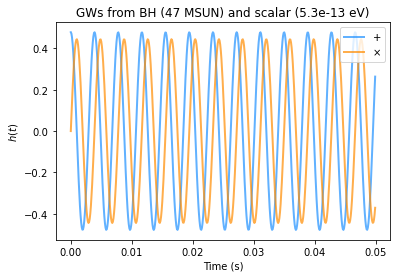

In [15]:
# Create a waveform and plot it
hp, hc = cloud.gw().hp, cloud.gw().hc
inclination = np.pi/4
time = np.arange(0, 0.05, 1E-4)

plot(time, hp(inclination, 0, time), label=r'$+$', color='dodgerblue', lw=2, alpha=0.7)
plot(time, hc(inclination, 0, time), label=r'$\times$', color='darkorange', lw=2, alpha=0.7)
xlabel("Time (s)");
ylabel(r"$h(t)$");
title("GWs from BH (%.f MSUN) and scalar (%.1e eV)"
          % (cloud.bhb_final.bh.mass_msun, cloud.bhb_final.boson.energy_ev));
legend(loc='upper right')

This folds in all the proper spheroidal harmonics and numerical factors.